# Week 5

# Getting Started with Pandas (Part 2)
# Data Analysis with Data Frames

In this week, we will look into a data set about movies and use data frames to perform data analysis.

In [ ]:
import pandas as pd

## 1. Download and extract MovieLens data

- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 
- We will look at its `ml-latest-small` dataset.

In [1]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import os 
import urllib.request
url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"

file_path = "data/" # This is a relative path from the default folder
zip_file = "ml-latest-small.zip"

# Create the data folder if it doesn't already exist.
if not os.path.exists(file_path):
    os.mkdir(file_path)

# Download file
urllib.request.urlretrieve(url, file_path + zip_file)

('data/ml-latest-small.zip', <http.client.HTTPMessage at 0x2ab7bc3d4c0>)

In [2]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [3]:
# Check that files has been unzipped
print(os.listdir(file_path + "ml-latest-small"))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [4]:
# Delete the zip file
os.remove(file_path + zip_file)

In [5]:
# Verify that the zip file is gone.
os.listdir(file_path)

['cereal.csv', 'ml-latest-small']

In [7]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path):
        os.mkdir(file_path)
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [8]:
get_movielens(file_path, zip_file)
# Remember file_path = "Data/" and zip_file = "ml-latest-small.zip"

File ml-latest-small.zip downloaded.
Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [9]:
import pandas as pd

ratings_df = pd.read_csv("data/ml-latest-small/ratings.csv")
ratings_df.head()  # Show the first several rows of the dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
# Ex: How many records are there?

ratings_df.shape

(100836, 4)

In [11]:
# Ex: Display the types of each feature

ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [15]:
# Convert time stamp to a readable format
from datetime import datetime

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

dt = datetime.fromtimestamp(timestamp)
print(dt)

print(dt.year)
print(dt.month)

ratings_df.loc[0, "Year"] = dt.year
# # ratings_df.loc[0, "Month"] = dt.month
# # ratings_df.loc[0, "Day"] = dt.day
# # ratings_df.loc[0, "Hour"] = dt.hour
# # ratings_df.loc[0, "Minute"] = dt.minute
# # ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

964982703
2000-07-30 14:45:03
2000
7


,userId,movieId,rating,timestamp,Year
0,1,1,4.0,964982703,2000.0
1,1,3,4.0,964981247,NaN
2,1,6,4.0,964982224,NaN
3,1,47,5.0,964983815,NaN
4,1,50,5.0,964982931,NaN


In [16]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,DT
0,1,1,4.0,964982703,2000.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,NaN,2000-07-30 14:48:51


We can also create functions to fill column year, month, ...

In [21]:
# Ex: Fill the year column

def extract_year(dt):
    
    return dt.year

extract_year(dt)

ratings_df['Year'] = ratings_df['DT'].apply(extract_year)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,DT
0,1,1,4.0,964982703,2000,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,2000-07-30 14:48:51


Alternatively, we can use `pd.to_datetime()` for the conversion. [Link](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [25]:
# Ex: Use pd.to_datetime() to perform the conversion.

pd.to_datetime(ratings_df['timestamp'], unit='s') # These are GMT times

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

## 3. Save the processed ratings data

Data can be saved in many different formats. Today we will save the processed rating data as a new CSV file.

In [26]:
# Save the processed data as a .csv file
csv_file = "Data/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [28]:
# Ex: Load the saved file and display its first 5 rows.
new_df = pd.read_csv(csv_file, index_col=0) # Use the first column as index
new_df.head()

,userId,movieId,rating,timestamp,Year,DT
0,1,1,4.0,964982703,2000,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,2000-07-30 14:48:51


## 4. Analyzing MovieLens Data
- Distribution of movie ratings
- Popular movies

In [31]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [32]:
# Find the number of ratings per year
ratings_df['Year'].value_counts()

2000    10061
2017     8203
2007     7111
2016     6703
2015     6616
2018     6413
1996     6040
2005     5813
2012     4656
2008     4375
2009     4134
2006     4062
2003     4014
2001     3922
2002     3478
2004     3279
1999     2439
2010     2301
1997     1916
2011     1690
2013     1664
2014     1439
1998      507
Name: Year, dtype: int64

In [33]:
# Find sorted the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts().sort_index(ascending=False)
print(rating_frequencies)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64


<AxesSubplot:>

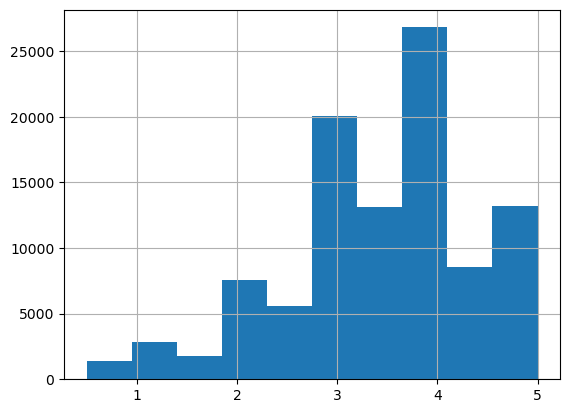

In [34]:
# Visualize rating frequencies as a histogram
ratings_df['rating'].hist()

In [ ]:
# When were these ratings created?
import numpy as np

print("Earliest year of rating:", ratings_df['Year'].min())

print("Latest year of rating:", np.max(ratings_df['Year'])) # .max() also works

print("The entire set of years:", ratings_df['Year'].value_counts().sort_index())

In [ ]:
# How are rating frequencies distributed in 2018?

# Create a filter in two steps
filter_2018 = (ratings_df['Year'] == 2018)
# print(filter_2018)
ratings_2018 = ratings_df[filter_2018]
ratings_2018.head()

In [ ]:
# Create a filter in one step:
ratings_2018 = ratings_df[ratings_df['Year'] == 2018]
ratings_2018.head()

In [ ]:
ratings_2018['rating'].hist()

In [ ]:
# Ex: How are rating frequencies distributed in 2003?



Next, let's identify some popular movies.

In [35]:
ratings_df.head()

,userId,movieId,rating,timestamp,Year,DT
0,1,1,4.0,964982703,2000,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,2000-07-30 14:48:51


In [40]:
# Ex: Which movie received the highest number of ratings?

# Attempt 1: Extract all rows with a particular ID
target_movie = 1
movie_ratings = ratings_df[ratings_df['movieId'] == target_movie]
num_ratings = movie_ratings.shape[0]
print(num_ratings)

# Attempt 2: use a for loop
count = 0
for row in ratings_df.index:
    if ratings_df.loc[row, 'movieId'] == target_movie:
        count += 1
print(count)

# Attempt 3: use value_counts()
ratings_df['movieId'].value_counts()

215
215


356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [ ]:
# Ex: Which movies received the largest number of 5.0s?




In [ ]:
# What is the name of the movie? (The answer requires another data file.)

# Load movies.csv
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv')
movies_df.head()

In [ ]:
# Ex: Find out the title corresponding to the movies with high number of ratings.



In [ ]:
# Which movie receives the most 5.0s?



In [ ]:
# Find the name of this movie



In [ ]:
# Which movie has the highest average rating?



In [ ]:
# Find the top ten highly-rated movies.

